In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Downloads/drowsiness_dataset.csv")
df = pd.DataFrame(data)

In [4]:
df.head()

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
0,54.0,1584091.0,5970731.0,6388383.0,0.0
1,54.0,1584091.0,5971202.0,6392174.0,0.0
2,54.0,1581111.0,5971295.0,6391469.0,0.0
3,54.0,1579343.0,5972599.0,6396137.0,0.0
4,54.0,1579321.0,5971906.0,6392898.0,0.0


In [5]:
df.tail()

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
4890255,63.0,2286384.0,5783226.0,6356797.0,2.0
4890256,63.0,2289887.0,5783786.0,6357004.0,2.0
4890257,63.0,2291928.0,5784221.0,6358348.0,2.0
4890258,63.0,2295386.0,5785012.0,6358565.0,2.0
4890259,63.0,2296992.0,5783386.0,6357466.0,2.0


In [8]:
df.columns.tolist()

['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness']

In [7]:
#sanity Check of data 

In [9]:
#shape
df.shape

(4890260, 5)

In [10]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890260 entries, 0 to 4890259
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   heartRate   float64
 1   ppgGreen    float64
 2   ppgRed      float64
 3   ppgIR       float64
 4   drowsiness  float64
dtypes: float64(5)
memory usage: 186.5 MB


In [11]:
#finding missing values
df.isnull().sum()

heartRate     0
ppgGreen      0
ppgRed        0
ppgIR         0
drowsiness    0
dtype: int64

In [12]:
#percentage of missing value
df.isnull().sum()/data.shape[0]*100

heartRate     0.0
ppgGreen      0.0
ppgRed        0.0
ppgIR         0.0
drowsiness    0.0
dtype: float64

In [13]:
#duplicates 
df.duplicated().sum()

2494973

In [14]:
#cleaning duplicates 
new_df = df.drop_duplicates()

In [15]:
#EDA

new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
heartRate,2395287.0,7.851849e+01,12.726022,50.0,68.0,78.0,87.0,119.0
ppgGreen,2395287.0,2.079983e+06,442560.859318,589758.0,1792113.5,2051875.0,2337797.0,3530798.0
ppgRed,2395287.0,5.649174e+06,391745.954124,4441989.0,5391682.5,5655620.0,5930027.0,6842637.0
ppgIR,2395287.0,5.733714e+06,432448.475162,4409976.0,5421761.0,5826641.0,6020060.0,7061799.0
drowsiness,2395287.0,8.415280e-01,0.832422,0.0,0.0,1.0,2.0,2.0


In [20]:
#UNIVARIATE (Numerical Column)

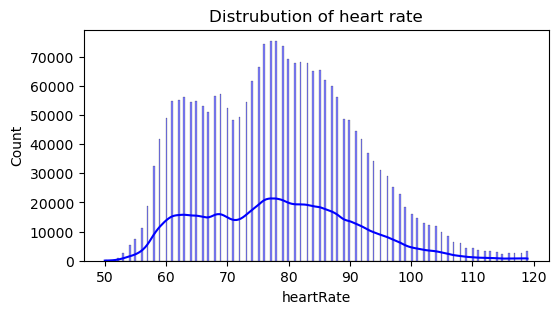

0.3473141107187113

In [23]:
plt.figure(figsize = (6,3))
sns.histplot(new_df['heartRate'], kde=True, color='blue')
plt.title("Distrubution of heart rate")
plt.show()

new_df['heartRate'].skew()

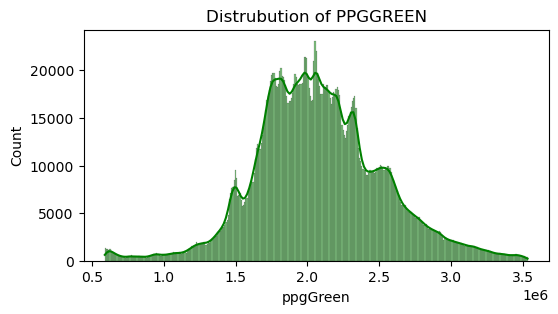

0.15251706792551495

In [24]:
plt.figure(figsize = (6,3))
sns.histplot(new_df['ppgGreen'], kde=True, color='green')
plt.title("Distrubution of PPGGREEN")
plt.show()

new_df['ppgGreen'].skew()

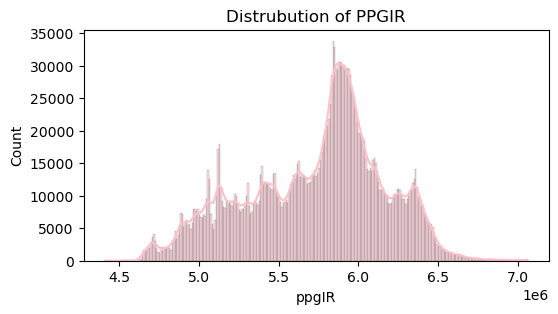

-0.3471468653627186

In [25]:
plt.figure(figsize = (6,3))
sns.histplot(new_df['ppgIR'], kde=True, color='pink')
plt.title("Distrubution of PPGIR")
plt.show()

new_df['ppgIR'].skew()

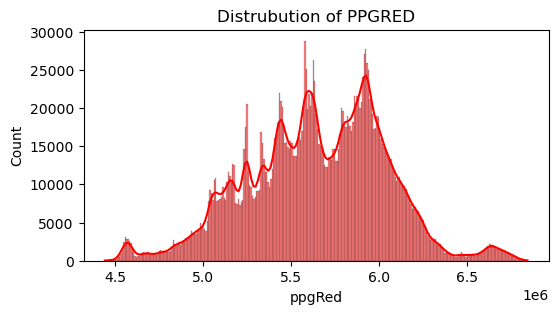

-0.15079743349583022

In [59]:
plt.figure(figsize = (6,3))
sns.histplot(new_df['ppgRed'], kde=True, color='red')
plt.title("Distrubution of PPGRED")
plt.show()

new_df['ppgRed'].skew()

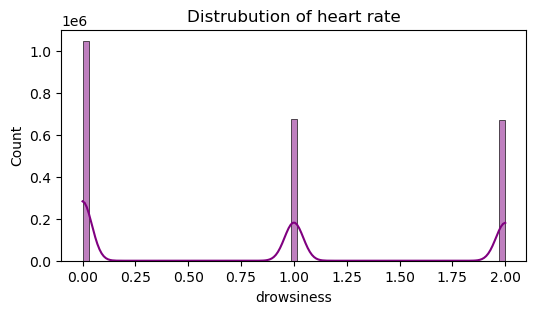

0.3032837343514282

In [26]:
plt.figure(figsize = (6,3))
sns.histplot(new_df['drowsiness'], kde=True, color='purple')
plt.title("Distrubution of Drowsiness")
plt.show()

new_df['drowsiness'].skew()

In [40]:
# Summary statistics for Heart Rate
hr_summary = {
    'Mean': new_df['heartRate'].mean(),
    'Median': new_df['heartRate'].median(),
    'Mode': new_df['heartRate'].mode()[0],
    'Standard Deviation': new_df['heartRate'].std(),
    'Variance': new_df['heartRate'].var(),
    'Range': new_df['heartRate'].max() - new_df['heartRate'].min(),
    'IQR': new_df['heartRate'].quantile(0.75) - new_df['heartRate'].quantile(0.25)
}

print(hr_summary)

{'Mean': 78.51848985111178, 'Median': 78.0, 'Mode': 77.0, 'Standard Deviation': 12.726022009977212, 'Variance': 161.95163619842447, 'Range': 69.0, 'IQR': 19.0}


In [41]:
# Summary statistics for PPGGREEN
ppgGreen_summary = {
    'Mean': new_df['ppgGreen'].mean(),
    'Median': new_df['ppgGreen'].median(),
    'Mode': new_df['ppgGreen'].mode()[0],
    'Standard Deviation': new_df['ppgGreen'].std(),
    'Variance': new_df['ppgGreen'].var(),
    'Range': new_df['ppgGreen'].max() - new_df['ppgGreen'].min(),
    'IQR': new_df['ppgGreen'].quantile(0.75) - new_df['ppgGreen'].quantile(0.25)
}

print(ppgGreen_summary)

{'Mean': 2079983.057524213, 'Median': 2051875.0, 'Mode': 1686835.0, 'Standard Deviation': 442560.8593175176, 'Variance': 195860114199.8596, 'Range': 2941040.0, 'IQR': 545683.5}


In [42]:
# Summary statistics for PPGRED
ppgRed_summary = {
    'Mean': new_df['ppgRed'].mean(),
    'Median': new_df['ppgRed'].median(),
    'Mode': new_df['ppgRed'].mode()[0],
    'Standard Deviation': new_df['ppgRed'].std(),
    'Variance': new_df['ppgRed'].var(),
    'Range': new_df['ppgRed'].max() - new_df['ppgRed'].min(),
    'IQR': new_df['ppgRed'].quantile(0.75) - new_df['ppgRed'].quantile(0.25)
}

print(ppgRed_summary)

{'Mean': 5649174.327444268, 'Median': 5655620.0, 'Mode': 5870697.0, 'Standard Deviation': 391745.95412398473, 'Variance': 153464892572.51117, 'Range': 2400648.0, 'IQR': 538344.5}


In [43]:
# Summary statistics for PPGIR

ppgIR_summary = {
    'Mean': new_df['ppgIR'].mean(),
    'Median': new_df['ppgIR'].median(),
    'Mode': new_df['ppgIR'].mode()[0],
    'Standard Deviation': new_df['ppgIR'].std(),
    'Variance': new_df['ppgIR'].var(),
    'Range': new_df['ppgIR'].max() - new_df['ppgIR'].min(),
    'IQR': new_df['ppgIR'].quantile(0.75) - new_df['ppgIR'].quantile(0.25)
}

print(ppgIR_summary)

{'Mean': 5733713.956636929, 'Median': 5826641.0, 'Mode': 5388577.0, 'Standard Deviation': 432448.47516245453, 'Variance': 187011683670.33203, 'Range': 2651823.0, 'IQR': 598299.0}


In [45]:
# Summary statistics for DROWSINESS

d_summary = {
    'Mean': new_df['drowsiness'].mean(),
    'Median': new_df['drowsiness'].median(),
    'Mode': new_df['drowsiness'].mode()[0],
    'Standard Deviation': new_df['drowsiness'].std(),
    'Variance': new_df['drowsiness'].var(),
    'Range': new_df['drowsiness'].max() - new_df['drowsiness'].min(),
    'IQR': new_df['drowsiness'].quantile(0.75) - new_df['drowsiness'].quantile(0.25)
}

print(d_summary)

{'Mean': 0.8415279672122797, 'Median': 1.0, 'Mode': 0.0, 'Standard Deviation': 0.8324223418832387, 'Variance': 0.6929269552663755, 'Range': 2.0, 'IQR': 2.0}


In [ ]:
#BIVARIATE ANALYSIS 

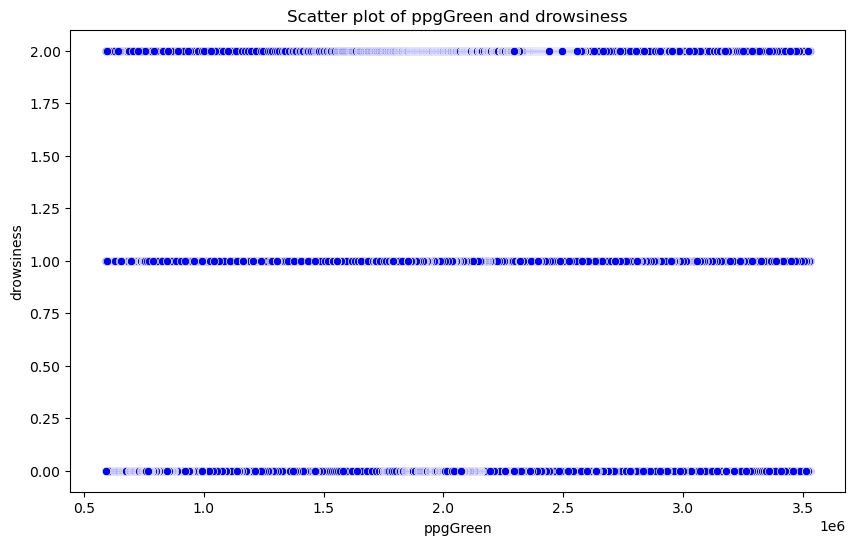

In [51]:
#ppgGreen and Drowsiness

plt.figure(figsize=(10,6))
sns.scatterplot(x=new_df['ppgGreen'],y=new_df['drowsiness'], color='blue')
plt.title('Scatter plot of ppgGreen and drowsiness')
plt.show()

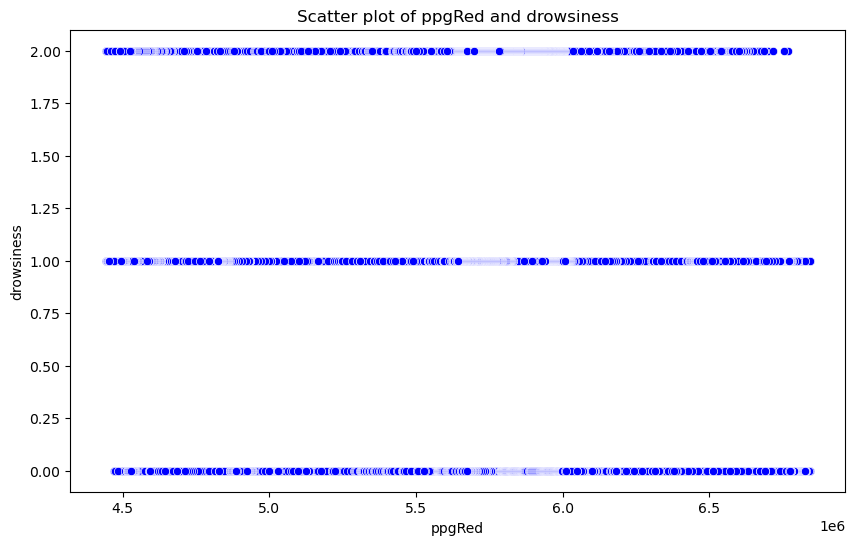

In [52]:
#ppgGreen and Drowsiness

plt.figure(figsize=(10,6))
sns.scatterplot(x=new_df['ppgRed'],y=new_df['drowsiness'], color='blue')
plt.title('Scatter plot of ppgRed and drowsiness')
plt.show()

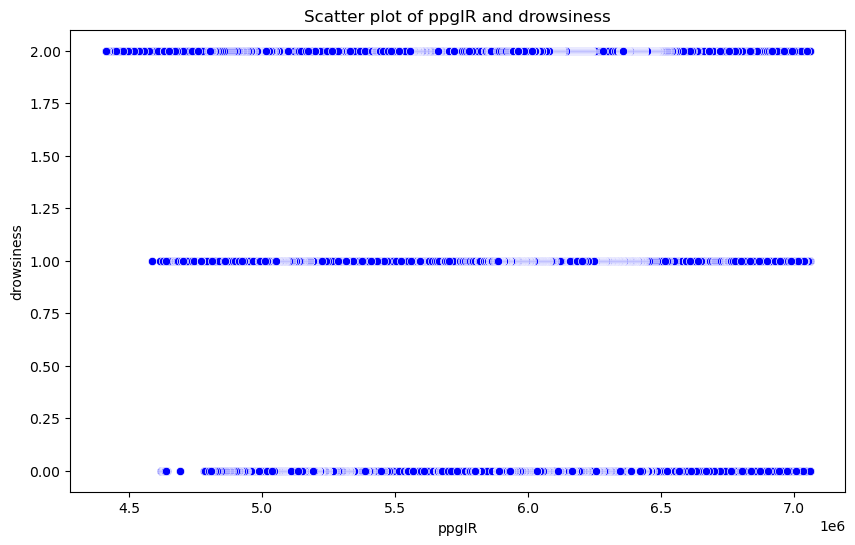

In [55]:
#ppgGreen and Drowsiness

plt.figure(figsize=(10,6))
sns.scatterplot(x=new_df['ppgIR'],y=new_df['drowsiness'], color='blue', data=data)
plt.title('Scatter plot of ppgIR and drowsiness')
plt.show()

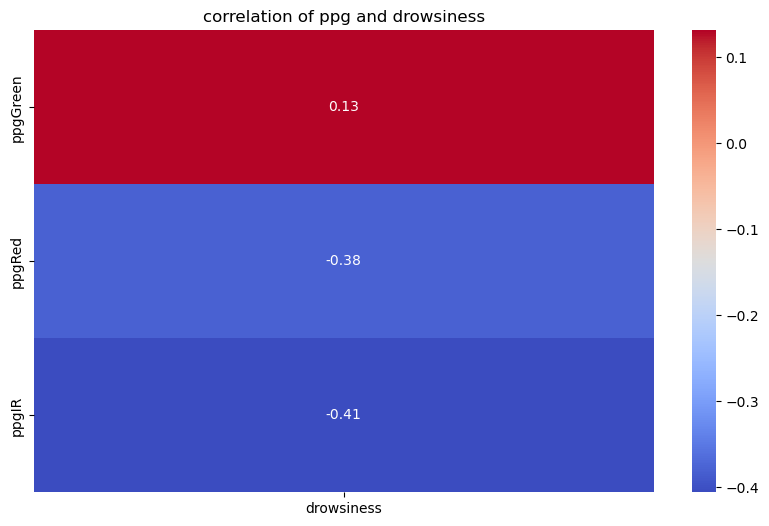

In [57]:
#HEATMAP
corr_rel = new_df[['ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness']].corr()
corr_data = corr_rel[['drowsiness']].loc[['ppgGreen', 'ppgRed', 'ppgIR']]

plt.figure(figsize =(10,6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('correlation of ppg and drowsiness')
plt.show()